## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

-------
Our objective is to understand when and how the serie varied in popularity. 
Obviously, we will have a look at the ratings and use them as a scale.
Then we will try to see how guest stars can influence the popularity of an episode. 
Also we will have a look and see if there are some time periods when the serie was really appreciated, less appreciated and we will also be able to observe the correlation between viewership and ratings

First of all we have to import our libraries and read our dataset.
In order to take a glimpse at the data structure, we can have a look at the first few lines. 

## 2. Let's see how data!


In [2]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]

dataset = pd.read_csv("datasets/office_episodes.csv")
dataset.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


Now it is time to dig a bit into the dataset and how the viewership evolves through time. 
We already can observe that the launching of the show was not that great but quickly, it gained a lot of viewers.
Through time it is slowly decaying which is not surprising as most series lose part of their viewership the longer they are.
Also, we can guess that the viewers lost interest in the show since the last 30 episodes. 
Maybe there is something happening in the serie which was not appreciated and people would not keep watching it?

Finally, one episode stands apart, it would be interesting to see why it was so appreciated.

Well, let's dig a bit deeper and see what are the reviews about the show.

So now, we can extract information from two different parameters and see how they correlate: appearance of a guest star and ratings.

## 2. First step towards data vizualisation

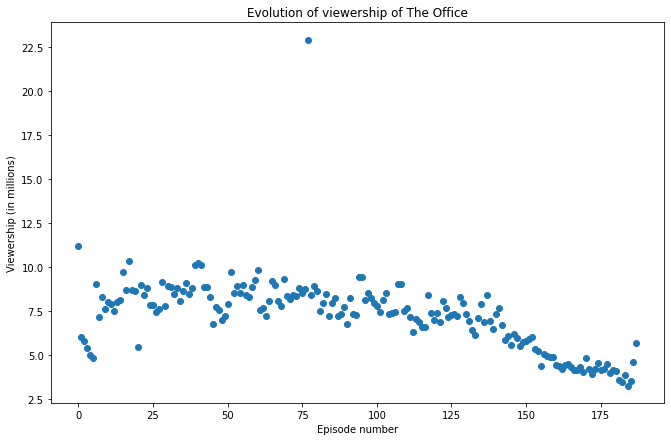

In [4]:
fig = plt.figure()

plt.scatter(dataset['episode_number'], dataset['viewership_mil'])
plt.title("Evolution of viewership of The Office")
plt.xlabel("Episode number")
plt.ylabel("Viewership (in millions)")
plt.show()

## 2. Highlighting episodes' rating

In [22]:
#Function to extract the list of the scaled_ratings, each color = one 0.25 interval
def colorlist(subset):
    colorList = []
    for lab, row in subset_star.iterrows():
        if row['scaled_ratings'] < 0.25:
            colorList.append('red')
        elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.50:
            colorList.append('orange')
        elif row['scaled_ratings'] >= 0.5 and row['scaled_ratings'] < 0.75:
            colorList.append('lightgreen')
        elif row['scaled_ratings'] >= 0.75:
            colorList.append('darkgreen')
        return colorList

In [23]:
colors = colorlist(dataset)

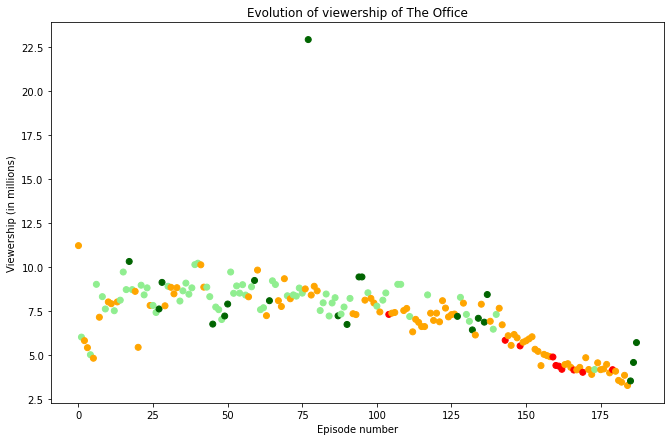

In [6]:
fig = plt.figure()

plt.scatter(dataset['episode_number'], 
            dataset['viewership_mil'], 
            c=colors)
plt.title("Evolution of viewership of The Office")
plt.xlabel("Episode number")
plt.ylabel("Viewership (in millions)")

plt.show()

## 3. Guest stars appeared!

In [7]:
sizes = []
for row in dataset['has_guests']:
    if row == True:
        sizes.append(250)
    else:
        sizes.append(25)

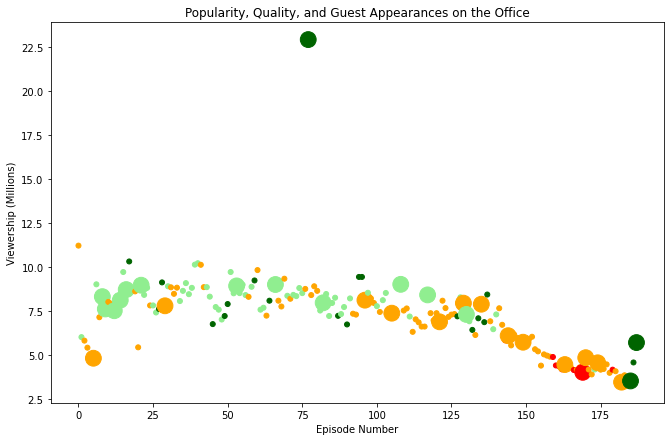

In [8]:
fig = plt.figure()

plt.scatter(dataset['episode_number'], 
            dataset['viewership_mil'], 
            c=colors, 
            s=sizes)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()

## 4. Visualization, the final step?

This last step is more about make our vizualition clearer in order to emphasize the influence of the guest stars in the viewership rate.

In order to do that, we have to make two subsets, one with episodes the stars and the second without them. 
To do that, we worked with some new markers and kept our scaled_ratings color which seemed to be good for vizualisation. 

Once we've done out vizualisation we can observe that the guest star appearance is not determinant for the viewership, except at the most viewed episode where we can guess that multiple celebrities in the same episode brought a lot of viewers. 

We can also see that guest stars do not influence much the rating. 

In [25]:
subset_star = dataset.loc[(dataset['has_guests'] == True)]
subset_nostar = dataset.loc[(dataset['has_guests'] == False)]

In [24]:
colors_s = colorlist(subset_star)
colors_n = colorlist(subset_nostar)

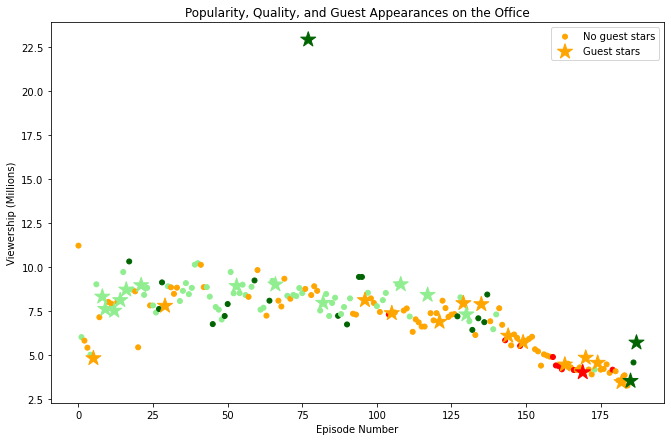

In [64]:
fig = plt.figure()

plt.scatter(subset_nostar['episode_number'], 
            subset_nostar['viewership_mil'],
           marker='o',
           s=25,
           c=colors_n,
           label='No guest stars')
plt.legend()
plt.scatter(subset_star['episode_number'], 
            subset_star['viewership_mil'],
           marker='*',
           s=250,
           c=colors_s,
           label='Guest stars')
plt.legend()

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

## 5. Decrypting the most viewed episode

As we can observe one episode has an exceptional viewership. 
We investigated a little this episode and can see that there are three big guest stars which could explain the popularity of this episode. 

In [56]:
dataset['guest_stars'][0:50]

guest_list = []
for row in dataset['guest_stars']:
    if pd.notnull(row) == True:
        guest_list.append(row)
        
guest_list = list(set(guest_list)) # All the guests invited in the show

dataset.iloc[dataset['viewership_mil'].idxmax()] # Info about most viewed episode. 

['Cloris Leachman, Jack Black, Jessica Alba', 'Timothy Olyphant', 'Joan Cusack, Ed Begley Jr, Rachel Harris, Nancy Walls', 'Nancy Carell', 'Idris Elba', 'Wendi McLendon-Covey', 'Mellisa Rauch', 'Will Arnett,  Ray Romano, Jim Carrey, Ricky Gervais', 'Tim Meadows', 'Jerome Bettis', 'Stephen Colbert', 'Josh Groban', 'Maura Tierney', 'Julius Winfield Erving', 'Ricky Gervais', 'Ken Jeong', 'Christian Slater', "Conan O'Brien", 'Mike Starr', 'Kevin McHale', 'Chris Bauer', 'Josh Groban, Stephen Collins', 'Amy Adams', 'Rob Riggle', 'Ryan Howard', 'Will Ferrell', 'Evan Peters', 'Michael Imperioli ']


episode_number                                                   77
season                                                            5
episode_title                                         Stress Relief
description       Dwight's too-realistic fire alarm gives Stanle...
ratings                                                         9.7
votes                                                          8170
viewership_mil                                                22.91
duration                                                         60
release_date                                             2009-02-01
guest_stars               Cloris Leachman, Jack Black, Jessica Alba
director                                              Jeffrey Blitz
writers                                            Paul Lieberstein
has_guests                                                     True
scaled_ratings                                              0.96875
Name: 77, dtype: object

In [57]:
top_star='Jack Black'